In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
T = pd.read_csv('processed_data.csv')

DJID 2006, het, Male, age 20.6 months
Dark: 221 cells, 29 GFP+ = 13%
Light: 229 cells, 36 GFP+ = 16%
Effect size (no GFP): 0.67
Effect size (GFP): 0.60


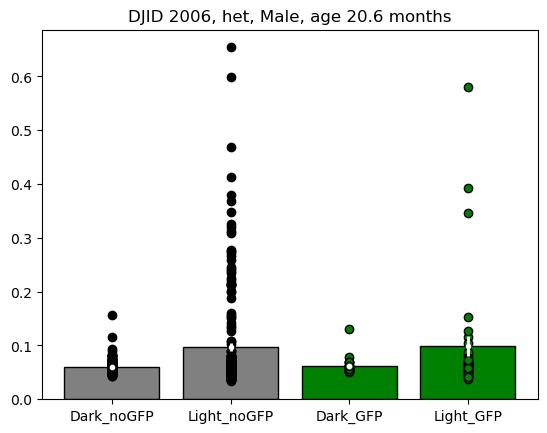

DJID 2007, het, Male, age 20.9 months
Dark: 153 cells, 30 GFP+ = 20%
Light: 248 cells, 38 GFP+ = 15%
Effect size (no GFP): 8.39
Effect size (GFP): 9.35


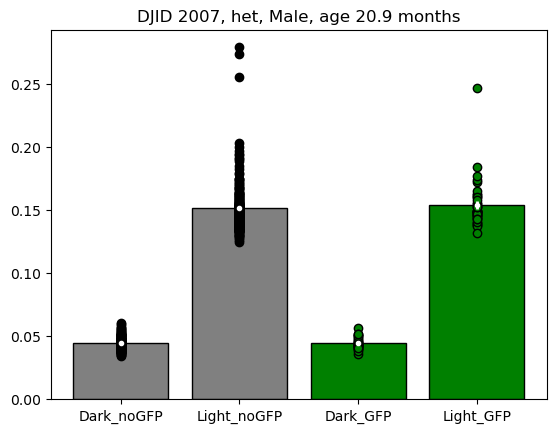

DJID 3101, homo, Male, age 5.2 months
Dark: 197 cells, 41 GFP+ = 21%
Light: 0 cells, 0 GFP+ = 0%
Effect size (no GFP): nan
Effect size (GFP): nan


c:\Users\Luis\anaconda3\envs\cellpose\lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\Luis\anaconda3\envs\cellpose\lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
c:\Users\Luis\anaconda3\envs\cellpose\lib\site-packages\numpy\core\_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\Luis\anaconda3\envs\cellpose\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
c:\Users\Luis\anaconda3\envs\cellpose\lib\site-packages\numpy\core\_methods.py:261: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


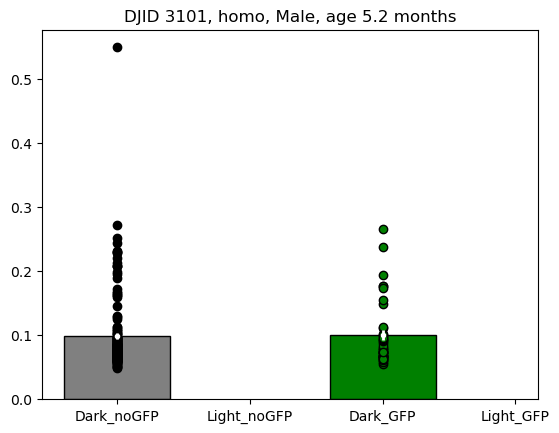

DJID 3201, homo, Male, age 4.3 months
Dark: 0 cells, 0 GFP+ = 0%
Light: 122 cells, 15 GFP+ = 12%
Effect size (no GFP): nan
Effect size (GFP): nan


c:\Users\Luis\anaconda3\envs\cellpose\lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\Luis\anaconda3\envs\cellpose\lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
c:\Users\Luis\anaconda3\envs\cellpose\lib\site-packages\numpy\core\_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\Luis\anaconda3\envs\cellpose\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
c:\Users\Luis\anaconda3\envs\cellpose\lib\site-packages\numpy\core\_methods.py:261: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


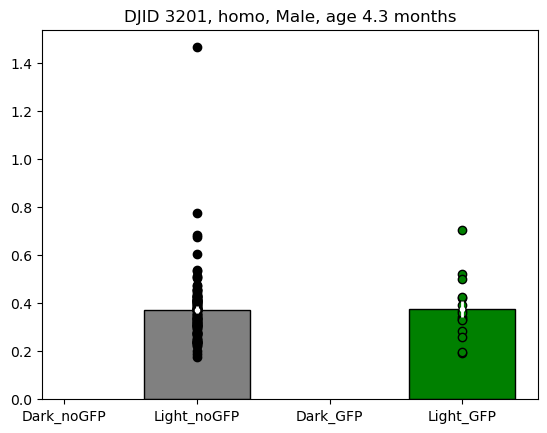

DJID 3203, homo, Female, age 4.5 months
Dark: 157 cells, 29 GFP+ = 18%
Light: 216 cells, 30 GFP+ = 14%
Effect size (no GFP): 6.67
Effect size (GFP): 9.50


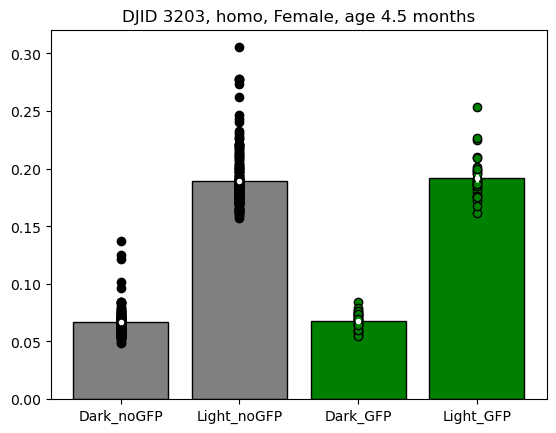

DJID 3318, homo, Female, age 3.3 months
Dark: 184 cells, 19 GFP+ = 10%
Light: 59 cells, 14 GFP+ = 24%
Effect size (no GFP): 5.92
Effect size (GFP): 8.95


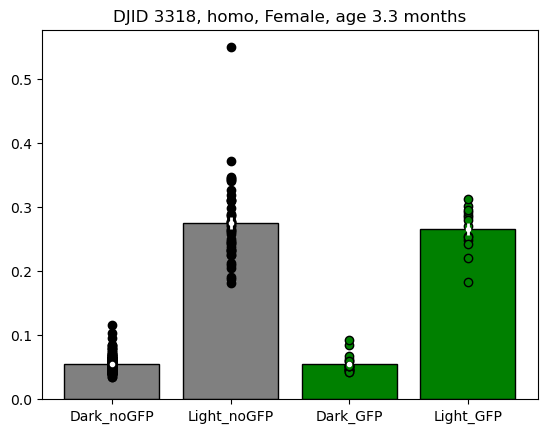

In [12]:
# Set response type
resp_type = 'glut1_membrane_over_wga_membrane'

animal_ids = T['DJID'].unique()

# Initialize storage
results = {
    'effect_size_noGFP': [],
    'effect_size_GFP': [],
    'genotype': [],
    'sex': [],
    'age': [],
    'animal_id': [],
    'n_cells': [],
    'frac_GFP': []
}

# Function to calculate ratios
def calculate_ratios(df, ratio_type):
    if df.empty:
        return []
    if ratio_type == 'glut1_membrane_over_middle':
        return (df['GluT1_Top_Integral'] + df['GluT1_Bottom_Integral']) / (df['GluT1_Middle_Integral'] * df['Length_um'])
    elif ratio_type == 'glut1_membrane_over_wga_membrane':
        return (df['GluT1_Top_Integral'] + df['GluT1_Bottom_Integral']) / (df['WGA_Top_Integral'] + df['WGA_Bottom_Integral'])

# Analysis loop
for a in animal_ids:
    T_thisAnimal = T[T['DJID'] == a]
    genotype, sex, age = T_thisAnimal.iloc[0][['Genotype', 'Sex', 'Age_Months']]
    N_cells = len(T_thisAnimal)

    T_dark = T_thisAnimal[T_thisAnimal['Experimental_Condition'] == 'Dark']
    T_light = T_thisAnimal[T_thisAnimal['Experimental_Condition'] == 'Light Flicker']

    T_dark_GFP, T_dark_noGFP = T_dark[T_dark['eGFP_Value'] > 0], T_dark[T_dark['eGFP_Value'] == 0]
    T_light_GFP, T_light_noGFP = T_light[T_light['eGFP_Value'] > 0], T_light[T_light['eGFP_Value'] == 0]

    frac_GFP = (len(T_dark_GFP) + len(T_light_GFP)) / N_cells if N_cells else 0

    print(f"DJID {a}, {genotype}, {sex}, age {age:.1f} months")
    print(f"Dark: {len(T_dark)} cells, {len(T_dark_GFP)} GFP+ = {100 * len(T_dark_GFP) / len(T_dark) if len(T_dark) else 0:.0f}%")
    print(f"Light: {len(T_light)} cells, {len(T_light_GFP)} GFP+ = {100 * len(T_light_GFP) / len(T_light) if len(T_light) else 0:.0f}%")
    
    ratios_dark_noGFP = calculate_ratios(T_dark_noGFP, resp_type)
    ratios_light_noGFP = calculate_ratios(T_light_noGFP, resp_type)
    ratios_dark_GFP = calculate_ratios(T_dark_GFP, resp_type)
    ratios_light_GFP = calculate_ratios(T_light_GFP, resp_type)

    response_vec_mean = [
        np.mean(ratios_dark_noGFP), np.mean(ratios_light_noGFP),
        np.mean(ratios_dark_GFP), np.mean(ratios_light_GFP)
    ]
    response_vec_sd = [
        np.std(ratios_dark_noGFP), np.std(ratios_light_noGFP),
        np.std(ratios_dark_GFP), np.std(ratios_light_GFP)
    ]
    response_vec_sem = [
        np.std(ratios_dark_noGFP) / np.sqrt(len(ratios_dark_noGFP) - 1) if len(ratios_dark_noGFP) > 1 else np.nan,
        np.std(ratios_light_noGFP) / np.sqrt(len(ratios_light_noGFP) - 1) if len(ratios_light_noGFP) > 1 else np.nan,
        np.std(ratios_dark_GFP) / np.sqrt(len(ratios_dark_GFP) - 1) if len(ratios_dark_GFP) > 1 else np.nan,
        np.std(ratios_light_GFP) / np.sqrt(len(ratios_light_GFP) - 1) if len(ratios_light_GFP) > 1 else np.nan,
    ]

    # Calculate effect sizes
    effect_size_noGFP = (response_vec_mean[1] - response_vec_mean[0]) / np.mean([response_vec_sd[1], response_vec_sd[0]])
    effect_size_GFP = (response_vec_mean[3] - response_vec_mean[2]) / np.mean([response_vec_sd[3], response_vec_sd[2]])

    # Print effect sizes
    print(f"Effect size (no GFP): {effect_size_noGFP:.2f}")
    print(f"Effect size (GFP): {effect_size_GFP:.2f}")

    # Store results
    results['effect_size_noGFP'].append(effect_size_noGFP)
    results['effect_size_GFP'].append(effect_size_GFP)
    results['genotype'].append(genotype)
    results['sex'].append(sex)
    results['age'].append(age)
    results['animal_id'].append(a)
    results['n_cells'].append(N_cells)
    results['frac_GFP'].append(frac_GFP)

    # Plotting
    plt.bar(['Dark_noGFP', 'Light_noGFP'], response_vec_mean[0:2], color='gray', edgecolor='black')
    plt.bar(['Dark_GFP', 'Light_GFP'], response_vec_mean[2:4], color='green', edgecolor='black')
    
    if len(ratios_dark_noGFP): plt.scatter(['Dark_noGFP'] * len(ratios_dark_noGFP), ratios_dark_noGFP, color='black')
    if len(ratios_light_noGFP): plt.scatter(['Light_noGFP'] * len(ratios_light_noGFP), ratios_light_noGFP, color='black')
    if len(ratios_dark_GFP): plt.scatter(['Dark_GFP'] * len(ratios_dark_GFP), ratios_dark_GFP, color='green', edgecolor='black')
    if len(ratios_light_GFP): plt.scatter(['Light_GFP'] * len(ratios_light_GFP), ratios_light_GFP, color='green', edgecolor='black')

    plt.errorbar(['Dark_noGFP', 'Light_noGFP'], response_vec_mean[0:2], yerr=response_vec_sem[0:2], fmt='.', color='white', linewidth=2)
    plt.errorbar(['Dark_GFP', 'Light_GFP'], response_vec_mean[2:4], yerr=response_vec_sem[2:4], fmt='.', color='white', linewidth=2)

    plt.title(f"DJID {a}, {genotype}, {sex}, age {age:.1f} months")
    plt.show()

# Convert results to DataFrame
result_table = pd.DataFrame(results)
result_table = result_table.dropna(subset=['effect_size_noGFP'])
